# Transformation + Scaling

In [1]:
# libraries/settings
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import plotly.express as px

In [2]:
df = pd.read_pickle(os.path.join('data', 'ohe_df.pkl'))

## Log Transforming  

Since the cont. values are right skewed I decided to do a log transofrmation instead of outlier removal since it's better to keep data than removing it. 
Data set has many 0 values and since the log(0) is undefined: -Inf, either we can add a constant (like 1) to all numbers and then apply np.log(x) or the box-cox method ort just the [yeo-johnson](https://scikit-learn.org/stable/modules/preprocessing.html) method since it supports 0/negative values. Outcome is still not a perfect normal distribution yet it shows a better normalization than the initial distribution. 

In [3]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

In [4]:
num_cols = ['administrative', 'administrative_duration', 'informational',
            'informational_duration', 'productrelated', 'productrelated_duration',
            'bouncerates', 'exitrates', 'pagevalues', 'specialday']


In [5]:
df_transform = df.copy()

In [6]:
df_transform[num_cols] = pt.fit_transform(df_transform[num_cols])

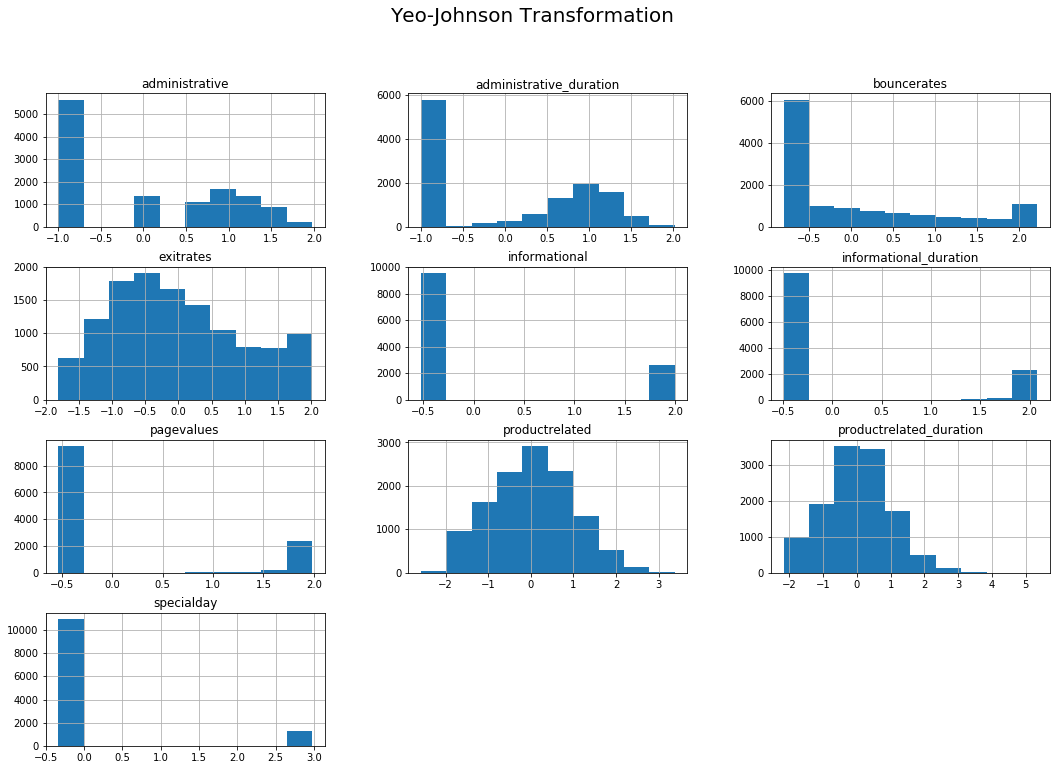

In [7]:
df_transform[num_cols].hist(figsize=(18,12))
plt.suptitle('Yeo-Johnson Transformation', size=20);

## Standard Scaling

In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [9]:
df_scaled = df_transform.copy()

In [10]:
df_scaled[df_scaled.columns] = ss.fit_transform(df_scaled)

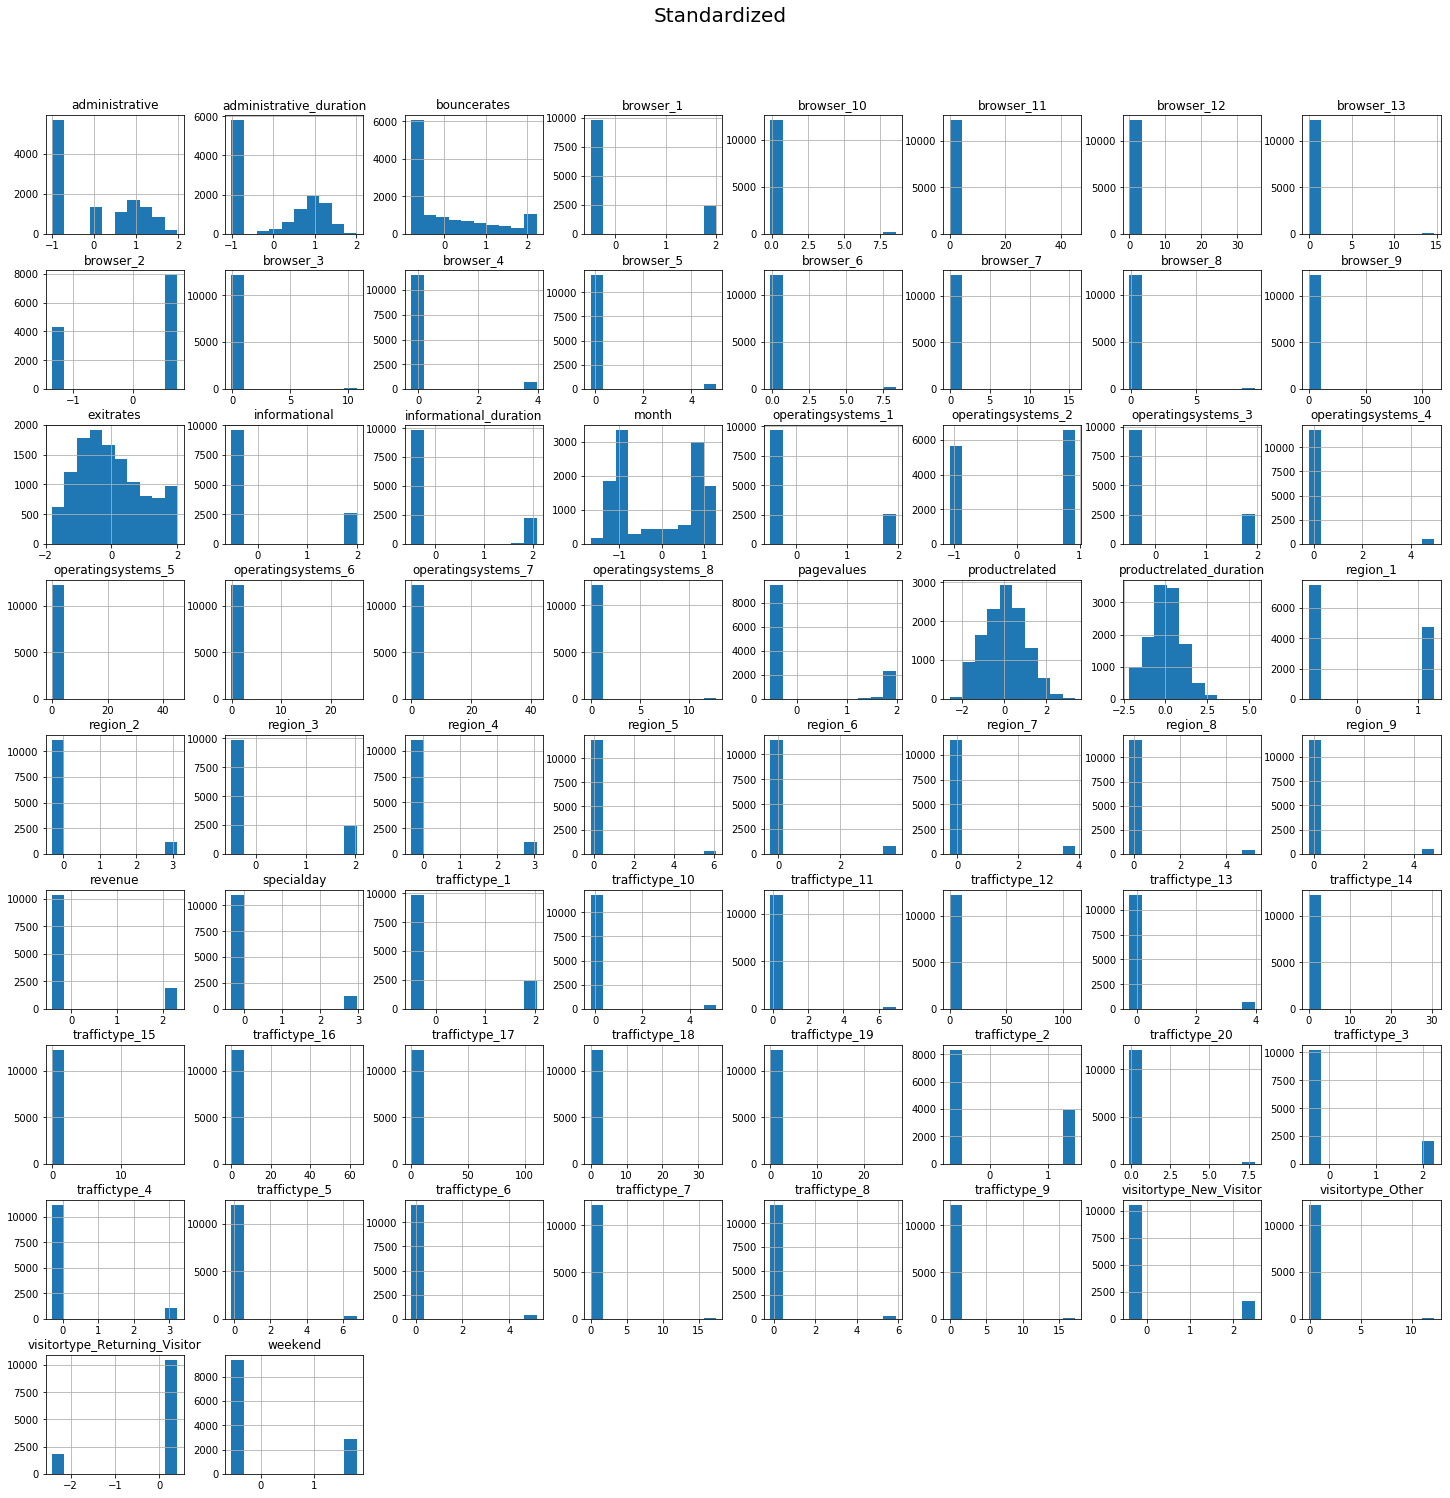

In [11]:
df_scaled.hist(figsize=(25,25))
plt.suptitle('Standardized', size=20, y=0.94);

In [12]:
from sklearn.preprocessing import normalize

X = df_scaled.copy()
X[X.columns] = normalize(X)


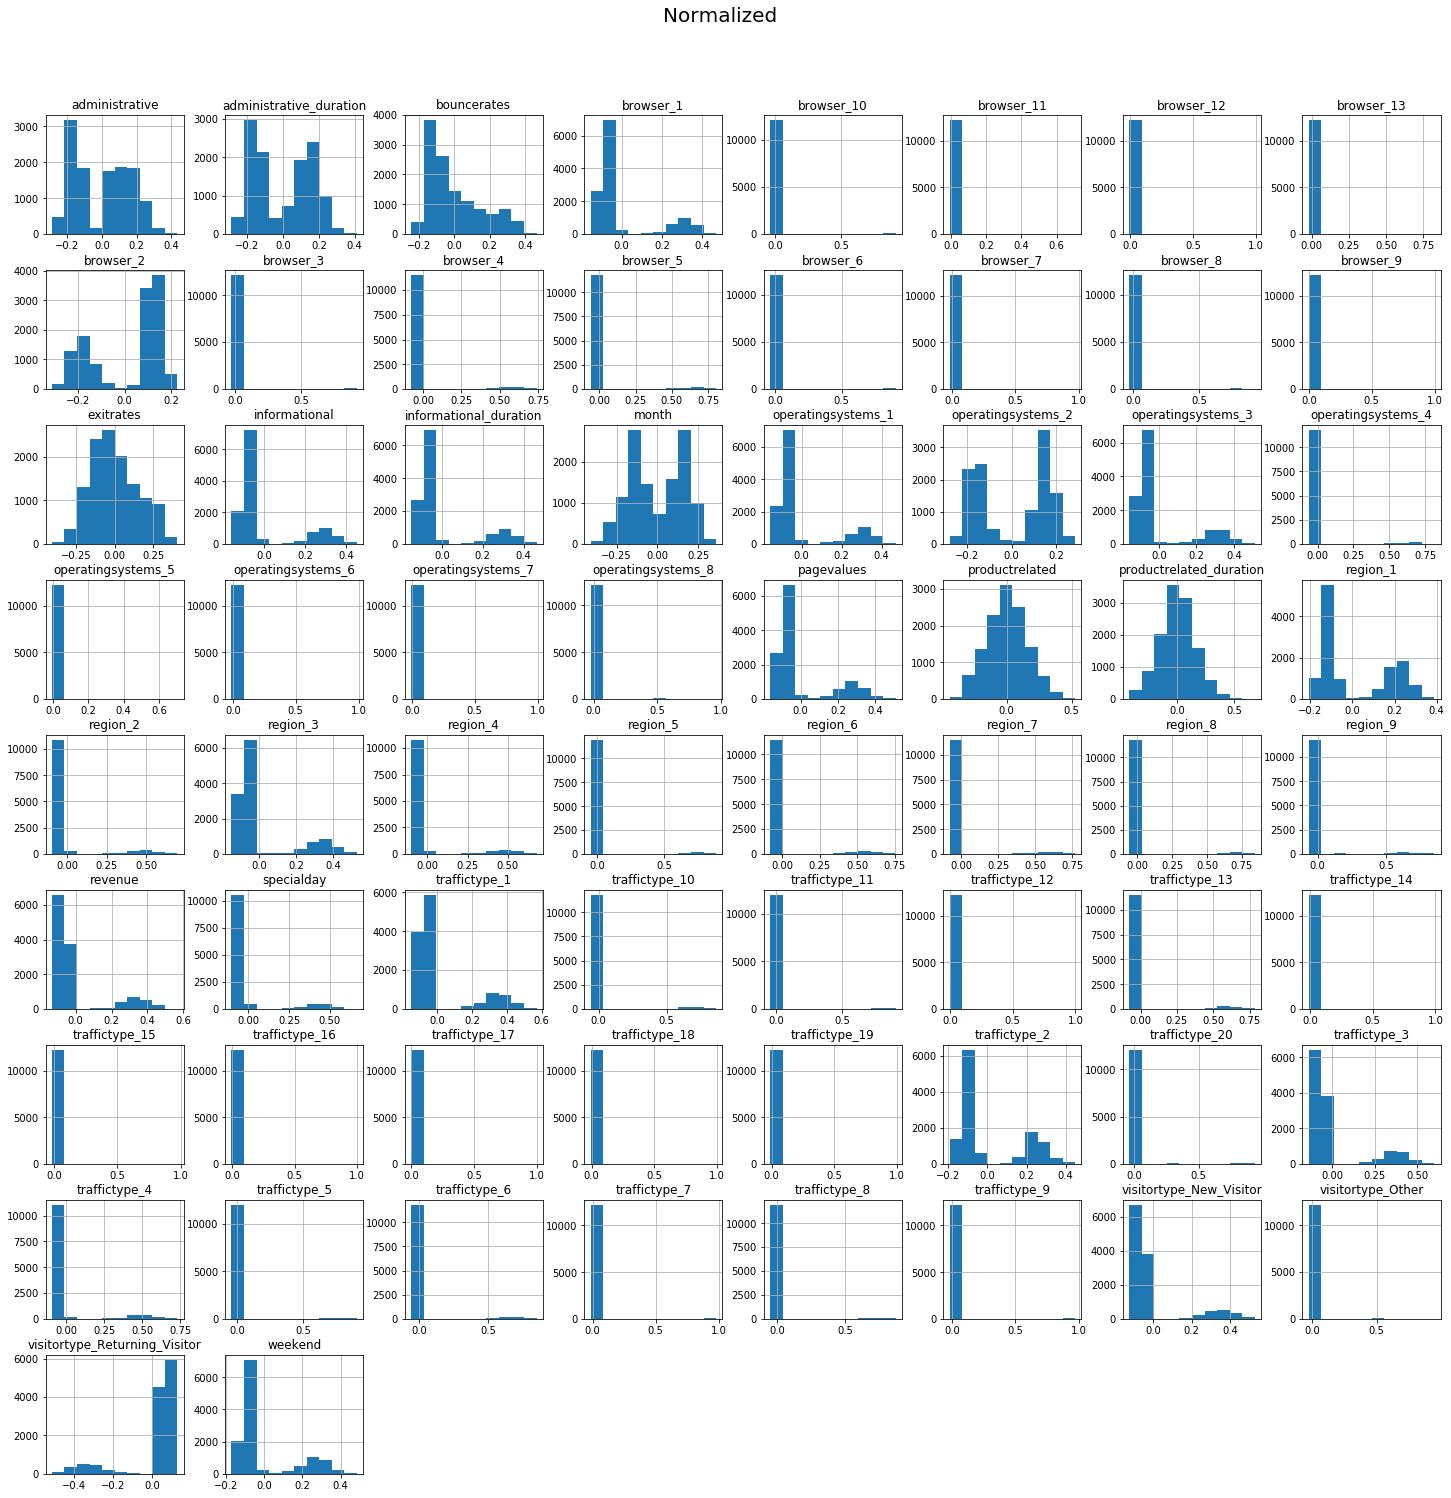

In [13]:
X.hist(figsize=(25,25))
plt.suptitle('Normalized', size=20, y=0.94);

# Clustering
## Clustering:  K-Means // DBSCAN(Density-Based Spatial Clustering of Applications with Noise) // OPTICS(Ordering Points to Identify Cluster Structure)


### Advantages:  
**K-means**: Much faster than DBSCAN and OPTICS.  
**DBSCAN**: No number of clusters needed  
**OPTICS**: No number of clusters needed. Identifies clusters with different densities. [Seemingly Parameterless?](https://towardsdatascience.com/clustering-using-optics-cac1d10ed7a7)

### Disadvantages:  
**K-means**: Estimated of number of clusters required  
**DBSCAN**: Does not work well over clusters with different densities  
**OPTICS**: Slower than DBSCAN  

## PCA Feature Reduction

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9, random_state=42).fit(X)
print('# of PCA componenets for 90% variation explaianbility:', pca.n_components_)
print('# of all features in the X:', X.shape[1])
X_pca = pd.DataFrame(pca.transform(X))

# of PCA componenets for 90% variation explaianbility: 31
# of all features in the X: 66


In [15]:
print('PCA results:', X_pca.shape, '\n', 'First 5 rows','\n', '='*60)
X_pca.head()

PCA results: (12205, 31) 
 First 5 rows 


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
0,-0.709881,0.377514,-0.154186,-0.161072,0.128799,-0.109661,-0.186741,-0.288657,-0.059708,0.004250,-0.152636,0.217414,0.109450,-0.163253,-0.095990,0.014569,-0.022981,0.034298,0.009526,0.028814,-0.067958,-0.013445,-0.011886,-0.007290,-0.005799,-0.004616,0.025330,0.143123,0.038436,0.004382,-0.012502
1,-0.449836,-0.278717,0.356017,-0.121058,0.329764,-0.014641,0.243742,-0.115334,-0.010422,-0.202830,-0.084882,0.145587,0.161560,-0.346437,-0.073719,0.058223,-0.004195,-0.040671,-0.044629,0.210706,-0.069839,0.068554,0.013167,0.010544,-0.016045,-0.027878,-0.001835,0.091999,0.087475,0.038477,0.005833
2,-0.501258,0.243256,-0.066170,-0.020425,-0.056582,0.162472,0.088479,-0.026943,0.014809,0.190265,0.034658,-0.022240,0.010342,-0.066479,0.022677,0.014855,0.002309,0.010740,-0.063249,0.135046,0.165466,0.441596,0.288029,-0.187699,0.361710,0.194604,-0.021277,0.275483,0.024617,-0.008346,-0.006517
3,-0.550028,-0.120182,-0.139870,0.309371,-0.124311,0.218209,-0.036722,-0.107569,0.232149,-0.283697,-0.015649,0.154185,-0.198311,-0.271115,0.168602,-0.200177,-0.140284,-0.075594,-0.225503,-0.168598,-0.092856,0.073185,-0.053646,-0.017427,-0.020016,-0.041598,0.014052,0.157532,0.054712,-0.003689,0.018302
4,-0.188328,0.032472,-0.087410,0.108549,0.071749,0.132829,-0.072656,-0.031856,0.100580,-0.211608,-0.123635,-0.121320,0.005160,0.013364,0.162269,-0.032885,0.069830,-0.039148,-0.000985,-0.099329,-0.011281,0.039176,-0.031591,0.047992,-0.027037,0.014142,0.035686,0.097222,0.041044,0.048415,0.002939


## KMeans - X_pca

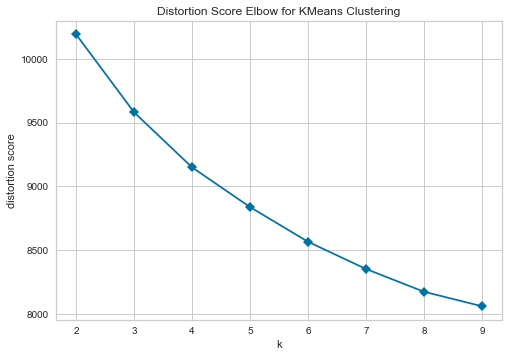

In [16]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
kmeans_model = KMeans(random_state=42, n_jobs=-1, algorithm='auto', init='k-means++')

visualizer = KElbowVisualizer(kmeans_model, k=(2, 10), timings=False)

visualizer.fit(X_pca)
visualizer.show();

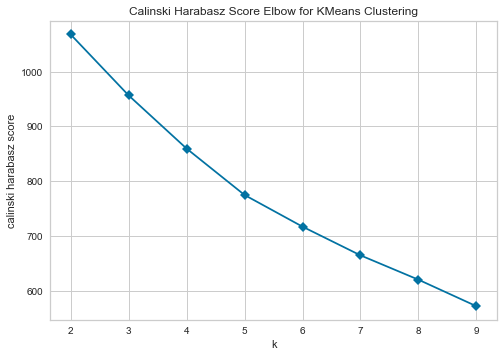

In [17]:
visualizer = KElbowVisualizer(
    kmeans_model, k=(2, 10), metric='calinski_harabasz', timings=False
)

visualizer.fit(X_pca)
visualizer.show();

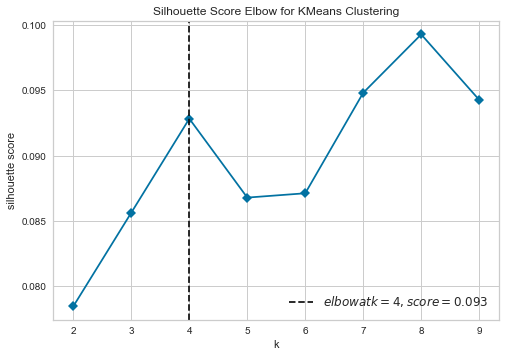

In [18]:
visualizer = KElbowVisualizer(kmeans_model,
                              k=(2, 10),
                              metric='silhouette',
                              timings=False,
                              locate_elbow=True)

visualizer.fit(X_pca)
visualizer.show();

## KMeans - X

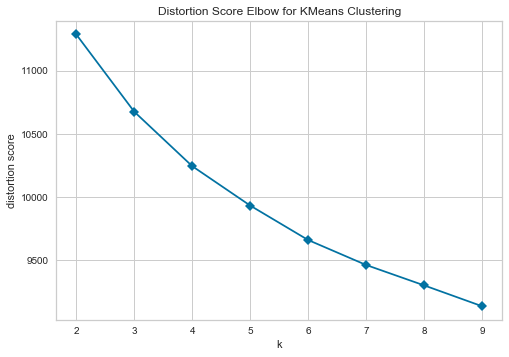

In [19]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
kmeans_model = KMeans()

visualizer = KElbowVisualizer(kmeans_model, k=(2, 10), timings=False)

visualizer.fit(X)
visualizer.show();

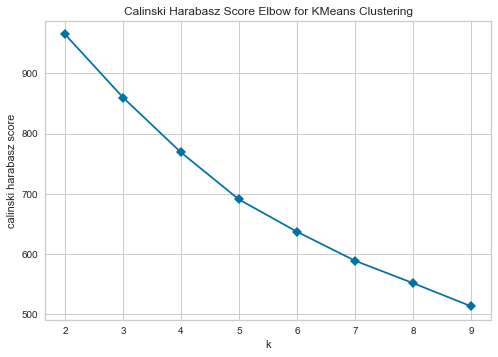

In [20]:
visualizer = KElbowVisualizer(
    kmeans_model, k=(2, 10), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)
visualizer.show();

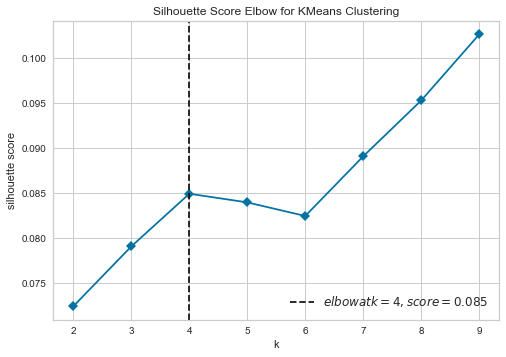

In [21]:
visualizer = KElbowVisualizer(kmeans_model, k=(2, 10),metric='silhouette', timings=False, locate_elbow=True)

visualizer.fit(X)
visualizer.show();

According to the Silhouette score of both pca and non_pca values, k=4 seems to be a good number of clusters.

In [22]:
kmeans_model = KMeans(n_clusters=4, random_state=42, n_jobs=-1, algorithm='auto', init='k-means++').fit(X_pca)

kmeans_labels = kmeans_model.predict(X_pca)


In [23]:
df['kmeans_label'] = kmeans_labels
df['kmeans_label'].value_counts()

0    4435
3    3967
1    2144
2    1659
Name: kmeans_label, dtype: int64

## Optics

In [24]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan

import datetime
t1 = datetime.datetime.now()

optics_model = OPTICS(min_samples=50, xi = 0.05, n_jobs=-1 ) 
  
# Training the model 
optics_model.fit(X_pca)
t2 = datetime.datetime.now() - t1
print(t2)

0:34:06.535243


In [25]:
  # Storing the cluster labels of each point 
optics_labels = optics_model.labels_[optics_model.ordering_] 

In [26]:
pd.Series(optics_labels).value_counts()


0    12205
dtype: int64

OPTICS is not doing a good job in our model since it only shows one class for all values

## DBSCAN

In [27]:
for eps in np.linspace(0,1.5, 50):
    dbscan_labels = cluster_optics_dbscan(reachability = optics_model.reachability_, 
                                    core_distances = optics_model.core_distances_, 
                                    ordering = optics_model.ordering_, eps = eps)
    print(f'eps: {eps} \n # of labels: {len(set(dbscan_labels))} \n {pd.Series(dbscan_labels).value_counts()}\n', '='*60)

eps: 0.0 
 # of labels: 1 
 -1    12205
dtype: int64
eps: 0.030612244897959183 
 # of labels: 1 
 -1    12205
dtype: int64
eps: 0.061224489795918366 
 # of labels: 1 
 -1    12205
dtype: int64
eps: 0.09183673469387754 
 # of labels: 1 
 -1    12205
dtype: int64
eps: 0.12244897959183673 
 # of labels: 1 
 -1    12205
dtype: int64
eps: 0.15306122448979592 
 # of labels: 1 
 -1    12205
dtype: int64
eps: 0.18367346938775508 
 # of labels: 2 
 -1    12149
 0       56
dtype: int64
eps: 0.21428571428571427 
 # of labels: 3 
 -1    12072
 0       95
 1       38
dtype: int64
eps: 0.24489795918367346 
 # of labels: 3 
 -1    11974
 0      176
 1       55
dtype: int64
eps: 0.2755102040816326 
 # of labels: 2 
 -1    11913
 0      292
dtype: int64
eps: 0.30612244897959184 
 # of labels: 2 
 -1    11858
 0      347
dtype: int64
eps: 0.336734693877551 
 # of labels: 2 
 -1    11759
 0      446
dtype: int64
eps: 0.36734693877551017 
 # of labels: 2 
 -1    11637
 0      568
dtype: int64
eps: 0.39795

Although DBSCAN does a better job than optics, still the number of clusters and the value of noises/outliers are poor in the model and most values are considered as outliers.

# Clustering Decision

After looking at the results, I have decided to go with the k-means. since the other two models are considering most of the values as noises. This can happen when we choose a lot of features for clustering. It is better to do separate clustering based on the values we need the interpretation for.

# KMeans Interpretation

Depending on the features/values that require interpretation our feature selection in the clustering requires changing. Additionally the aggregation method in the groupby cluster can also differ depending on the type of interpretation we'd need to do. 

In [24]:
# I'm just replacing the value of the clusters for better interpretation
# since it would be easier to interpret the clusters based on their order of 0, 1, 2, 3
df.kmeans_label = df.kmeans_label.map({1:2, 2:1, 0:0, 3:3})

In [25]:
df.groupby('kmeans_label').mean().T

kmeans_label,0,1,2,3
administrative,0.379030,2.594937,1.989272,4.611797
administrative_duration,10.976128,93.486875,72.956165,160.398688
informational,0.053439,0.338758,0.450560,1.120242
informational_duration,3.130965,19.549897,28.338329,80.153310
productrelated,14.925592,18.358047,23.604944,61.471389
productrelated_duration,543.818895,648.105219,860.673675,2369.269770
bouncerates,0.036999,0.002715,0.026528,0.005835
exitrates,0.065877,0.018211,0.048165,0.020279
pagevalues,0.962033,11.018369,4.276650,10.309887
specialday,0.105163,0.018807,0.056903,0.034384


In [26]:
for col in ['month', 'weekend', 'revenue']:
    print(df.groupby('kmeans_label')[col].value_counts(), '='*60)

kmeans_label  month
0             5        1545
              3         843
              11        829
              12        521
              7         160
              6         124
              8         109
              9         107
              2         102
              10         95
1             11        413
              12        328
              5         305
              3         230
              10        121
              9         108
              8          70
              7          54
              6          29
              2           1
2             5         549
              11        521
              3         324
              12        301
              10        117
              7          82
              8          77
              2          67
              6          54
              9          52
3             11       1219
              5         930
              12        556
              3         463
              10        216


## Interpretation

I focus on few points for each cluster:

Additional interpretations can be done based on all variables we have.

These interpretations are done mostly based on the mean values, counts and also the scatter matrix below.


**Cluster 3**: It has the highest number of *revenue*/profitable shoppers.  looking at the cont. variables we can see they have the highest mean of 61.47 in *product_related* pages. Also their *duration* in this category is much higher *2369* compared to other values. Almost all of them (%99) percent of them are returning visitors,  %40 of them fall into *traffic_type_2* and %39 are from *region1*. This group also had higher *administrative* and *informational duration* means compared to all other three clusters.

**Cluster 2**: In terms of the revenue they'd be considered the third group with the highest profitable shoppers (247) although their mean *pagevalues* is 4.2 and lower than **cluster 1**. So appearantly they see less pages and do their shopping which maybe means they already know what they need to buy compared to the impulse shopping or just browsing. Their distribution on the months are more balanced compared to **cluster 0** and **3** and the top 5 *months* are 5, 11, 3, 12, 10. %89 of them use *operatingsystem_1* and near %10 *operatingsystem_4*. %93 of them use *browser_1* and the remaining mainly use *browser_2* and *browser_8*.

**Cluster 1**: Comparing this group to all other clusters, one thing to note is that near all of the *visitortype* are new visitors. Between all groups, this cluster has the highest percentage of %21 in *browser type 1* and %61 in *type_2*.  Additionally, based on their *pagevalues* they have the highest mean value of 11.

**Cluster 0**: It has the lowest revenue/profitable shoppers with only 130 of them. In nearly all of our cont. variables for the *page type* and *page durations*, they have the lowest means values. One thing to note is that they have a highest value of 0.10 for their mean of special day which might mean these were shoppers who surfed the website in very short periods of time during specific holidays/etc (additional statistics test required) while %98 of them being returning customers. Also among all groups they have the highest number of 1545 records in month 5 (May). Almost %80 of them are using *browser_2* and %62 of them are using *operatingsystem_2*.

Most of the clusters have the same range of means for different regions with *region_1* being the highest in all of them (close to %40) and *region_2* taking the second place (close to %20). 

Although there are many things to interpret, one thing to note is that cluster 0 and 2 seem to be related with higher bounce rates. This can also make sense since these two groups had lower revenue/shopping.

All in all if we wanted a very easy interpretation for our future classification, we could say that cluster 3 has the highest profitability and 0 has the lowest one. 

# Clustering Visualizations

In [27]:
df.kmeans_label = df.kmeans_label.astype('category')

In [28]:
fig = px.scatter_matrix(df, dimensions=[ 'administrative_duration',
       'informational_duration','productrelated_duration',
       'bouncerates', 'pagevalues', 'month',
       'weekend', 'revenue'], color='kmeans_label', 
       opacity=0.5, height=1800, width=1800, 
       category_orders={"kmeans_label": [0,1,2,3]}, 
       title='Cluster Coded Scatter Matrix of Features',
       color_discrete_sequence=px.colors.qualitative.Plotly)
fig.show()

# Exporting Data for Classification

Since Normalization and transofrmations are already done on the dataset. I'll just attach the classes to my X and X_pca values for classification.

In [33]:
X['kmeans_label'] = kmeans_labels
X.to_pickle(os.path.join('data', 'X.pkl'))

In [34]:
X_pca['kmeans_label'] = kmeans_labels
X_pca.to_pickle(os.path.join('data', 'X_pca.pkl'))